## Importation des librairies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [12]:
#  load nbaPlayersAllTimesAgilityData.csv and nbaPlayersAllTimesInfoData
df = pd.read_csv('nbaPlayersAllTimesInfo.csv')

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

# remane colum Player to PLAYER
df = df.rename(columns={'Player': 'PLAYER'})

# remove space in player
df['PLAYER'] = df['PLAYER'].str.replace(' ', '')


df = df[['PLAYER', 'Height', 'Weight']]

# remove duplicates
df = df.drop_duplicates(subset=['PLAYER'], keep='first')

# calcul the mean from each column where value is set
heightMean = df[df[df['Height'] != '-'] != 0]['Height'].astype(float).mean()
weightMean = df[df[df['Weight'] != '-'] != 0]['Weight'].astype(float).mean()

# set value to the mean where the value is not set
# replace 0 by the mean
df['Height'] = df['Height'].replace(0, heightMean)
df['Weight'] = df['Weight'].replace(0, weightMean)

# replace '-' by mean
df['Height'] = df['Height'].replace('-', heightMean)
df['Weight'] = df['Weight'].replace('-', weightMean)


# convert height to meters and round to decimal
df['Height'] = df['Height'].apply(pd.to_numeric)
df['Height'] = round(df['Height'] / 100, 2)

# get correlation
df1 = df[['Height', 'Weight']]
df1 = df1.corr()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Correlation entre les données 'Height' et 'Weight' 

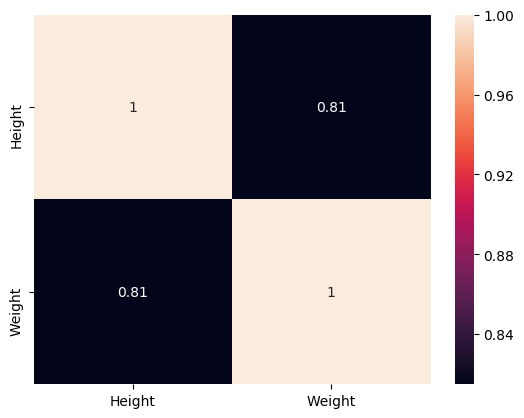

In [13]:
sns.heatmap(df1, annot=True)

Ces champs ont une correlation supérieure à 0.5, par conséquent elles valent le coup d'être analysées.

## Vue globale des champs du dataframe sur 5 lignes

In [14]:
df.head()

,PLAYER,Height,Weight
0,AlaaAbdelnaby,2.08,108.862080
1,ZaidAbdul-Aziz,2.06,106.594120
2,KareemAbdul-Jabbar,2.18,102.058200
3,MahmoudAbdul-Rauf,1.85,73.481904
4,TariqAbdul-Wahad,1.98,106.594120


## Analyse du champ "Height"

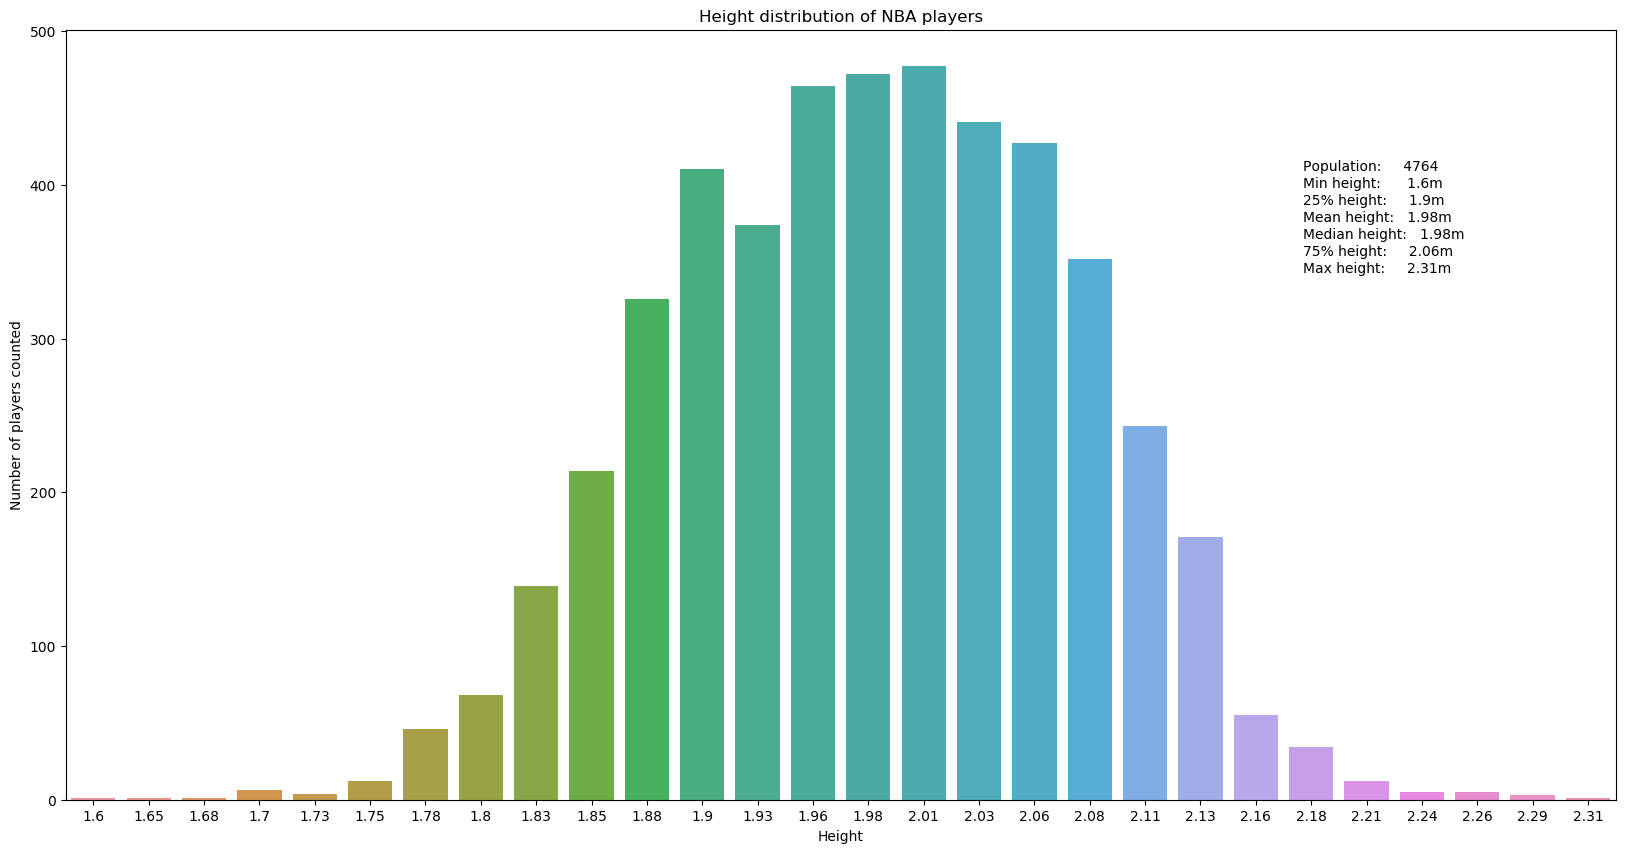

In [21]:
heightInfos = df['Height'].describe()

plt.figure(figsize=(20, 10))
sns.countplot(x='Height', data=df) 
plt.title('Height distribution of NBA players')
plt.xlabel('Height')
plt.ylabel('Number of players counted')

plt.annotate('Population:     ' + str(int(heightInfos['count'])), xy=(0.5, 0.5), xytext=(0.8, 0.8), textcoords='figure fraction')
plt.annotate('Min height:      ' + str(heightInfos['min']) + 'm', xy=(0.5, 0.5), xytext=(0.8, 0.78), textcoords='figure fraction')
plt.annotate('25% height:     ' + str(heightInfos['25%']) + 'm', xy=(0.5, 0.5), xytext=(0.8, 0.76), textcoords='figure fraction')
plt.annotate('Mean height:   ' + str(round(heightInfos['mean'],2)) + 'm', xy=(0.5, 0.5), xytext=(0.8, 0.74), textcoords='figure fraction')
plt.annotate('Median height:   ' + str(df['Height'].median()) + 'm', xy=(0.5, 0.5), xytext=(0.8, 0.72), textcoords='figure fraction')
plt.annotate('75% height:     ' + str(heightInfos['75%']) + 'm', xy=(0.5, 0.5), xytext=(0.8, 0.70), textcoords='figure fraction')
plt.annotate('Max height:     ' + str(heightInfos['max']) + 'm', xy=(0.5, 0.5), xytext=(0.8, 0.68), textcoords='figure fraction')
plt.show()

Nous pouvons visuellement déduire que : 
 
- la taille minimale semble être 1.6m
- la taille moyenne des joueurs est entre 1.96m et 2.01m
- la taille maximale semble être 2.31m

Grâce aux annotations que nous avons ajoutées au graphique, issues d'un traitement statistique, nous comprennons que : 

- Le plus petit joueur mesure en effet bien 1.6m
- Les 25% plus petits joueurs mesurent moins de 1.9m, c'est déjà énorme !
- La moitié des joueurs se trouvent en dessus de 1.98m, ici c'est une coincidence, la médiane n'est pas toujours égale à la moyenne.
- La taille moyenne est exactement de 1.98m
- Les 25% plus grands joueurs mesurent plus de 2.06m.
- Le plus grand joueur mesure en effet bien 2.31m

Tout cela est résumé visuellement via ce graphique :

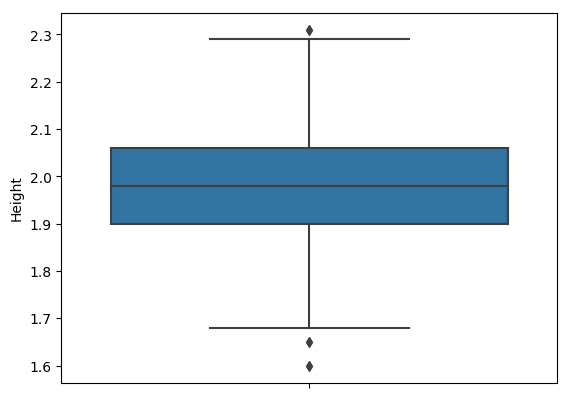

In [22]:
sns.boxplot(y=df['Height'])
plt.show()

## Analyse du champ "Weight"

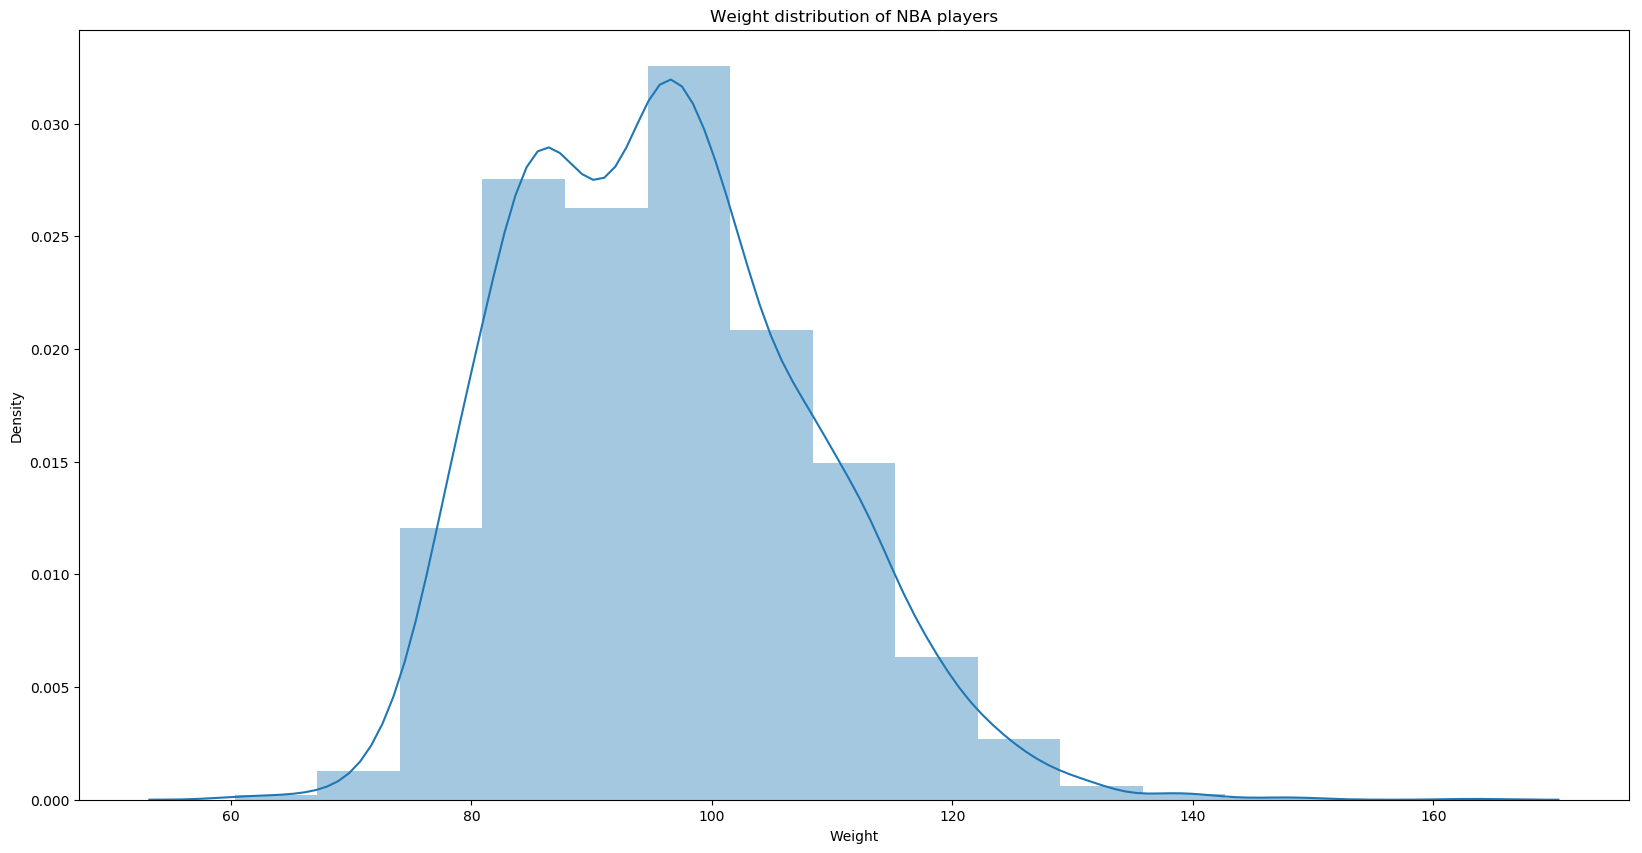

In [77]:
# show weight distribution
weightInfos = df['Weight'].describe()

plt.figure(figsize=(20, 10))
sns.distplot(df['Weight'], bins=15, kde=True) #bins=15, kde=True
plt.title('Weight distribution of NBA players')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

Nous pouvons visuellement déduire que : 
 
- le poids minimum semble être 60 kg
- le poids moyen des joueurs semble être aux alentours de 90 kg
- le poids maximum semble être aux alentours de 140/150 kg

Grâce à un traitement statistique, nous savons que : 

- Le joueur le plus léger pèse 60.3 kg
- Les 25% plus légers joueurs pèsent moins de 86 kg, c'est déjà assez lourd !
- La moitié des joueurs pèsent plus de 95.2 kg
- Le poids moyen est de 95.9 kg
- Les 25% plus lourds joueurs pèsent plus de 104 kg
- Le plus lourd joueur pèse 163.3 kg

Tout cela est résumé visuellement via ce graphique :

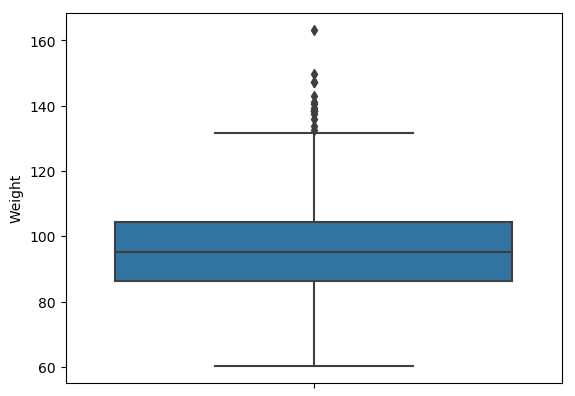

In [28]:
sns.boxplot(y=df['Weight'])
plt.show()

## Analyse de la taille et du poids

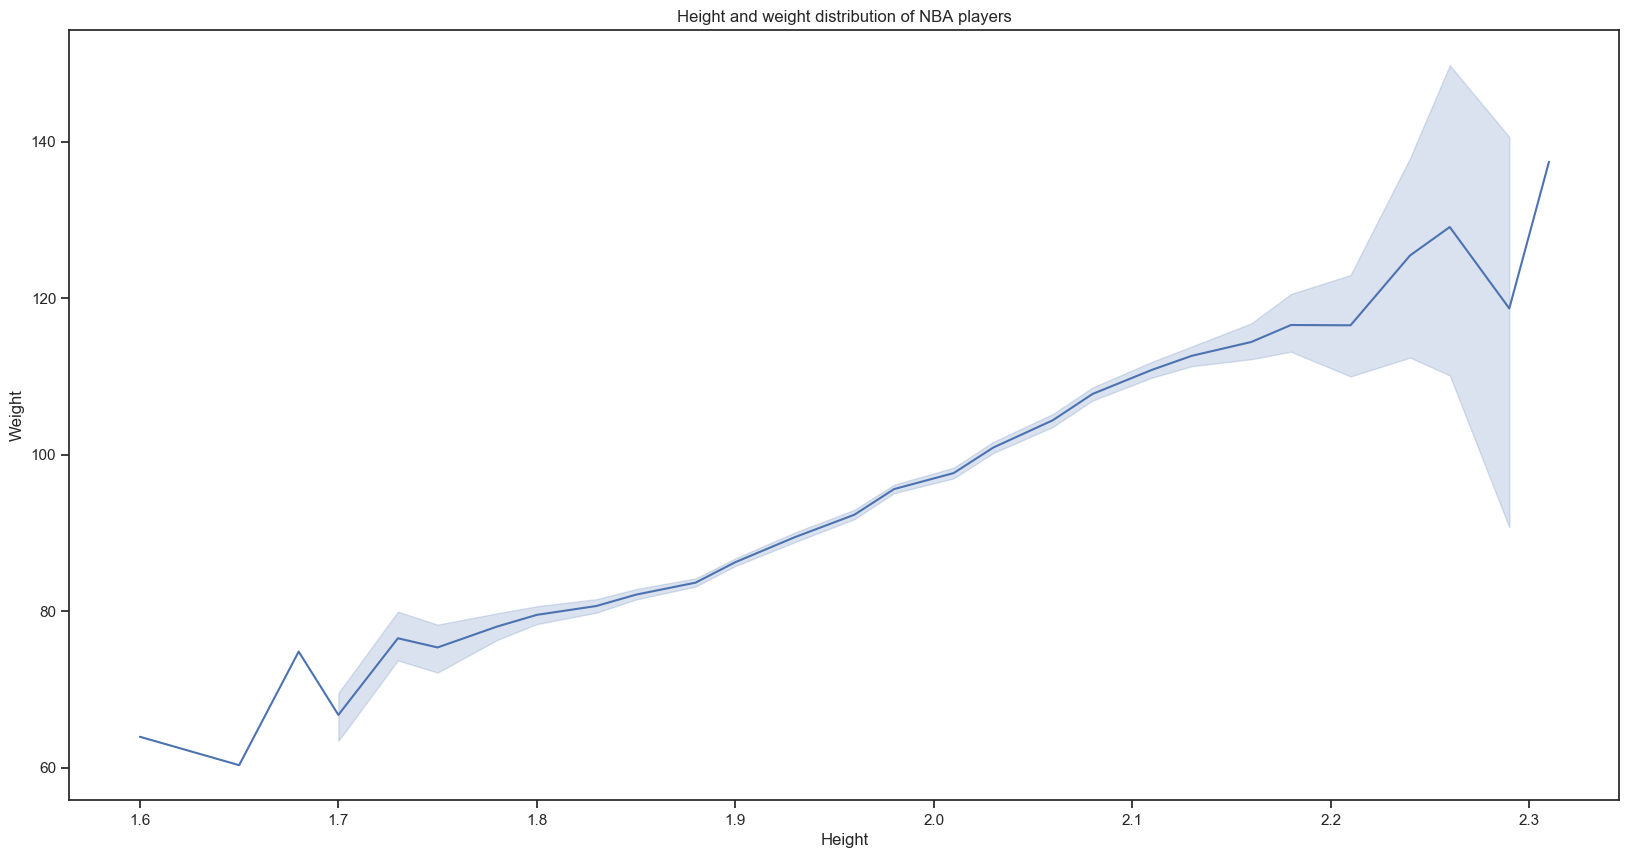

In [80]:
# display a plot of the distribution of height and weight
plt.figure(figsize=(20, 10))
sns.lineplot(x='Height', y='Weight', data=df,) 
plt.title('Height and weight distribution of NBA players') 
plt.xlabel('Height') 
plt.ylabel('Weight') 
plt.show()

## Finalement, nous constatons que dans la NBA, dans le milieu des professionnels de haut niveau de basket-ball : plus on est grand plus on est lourd.
## Cela confirme cette intuition commune.